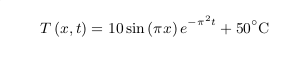



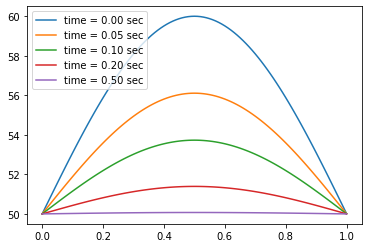

In [9]:
import numpy as np
import matplotlib.pyplot as plt


alpha = 1.
Lx = 1. # meters



Nx = 100
h_x = Lx / Nx
x_arr = h_x * (np.arange(Nx+1))
#print(h_x)

#print (x_arr)


#t = 0.
#t = 10. #seconds

t_arr = np.array([0,0.05,0.1,0.2,0.5]) # seconds 


PI = 3.14 #np.pi



for t in t_arr:
    
    T_analytic = 10.* np.sin(PI * x_arr )* np.exp(-PI**2 * t) + 50.
    plt.plot(x_arr, T_analytic,label = 'time = %.2f sec'%(t))
    
plt.legend(loc="upper left")


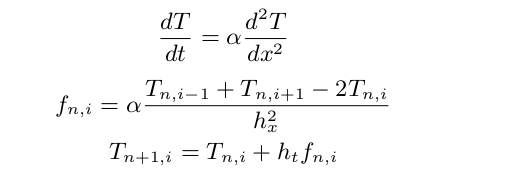



In [46]:




import numpy as np
import matplotlib.pyplot as plt
plt.close('all')
alpha = 1. # m^2/s
beta = 9. #1/s
T_air = 30. # air temperature
#===== X Array =====
Lx = 1. # meters
Nx = 20
h_x = Lx / Nx
x_arr = h_x * (np.arange(Nx+1))
#===== Time Array =====
h_t = 0.0001 # seconds
Nt = 10000 # number of time steps
total_time = Nt * h_t # seconds
t_arr = h_t * (np.arange(Nt+1))
#print (t_arr)
#===


T_Data= np.zeros([Nt+1, Nx+1])
PI = np.pi
#T_Data[0,] = 10.* np.sin(PI * x_arr ) + 50.
# check different initial conditions for Temperature
#T_Data[0,] = 50. * x_arr**2. 
#T_Data[0,] = -50. * x_arr**2. + 100. * x_arr
T_Data[0,] = 50. * np.heaviside(x_arr - 0.5, 0.5)  # y = heaviside(x, y_c): x<0.5, y=0; x>0.5, y=1; x=0.5, y=y_c

for n in range(0,Nt):
    for i in range(1, Nx):
        f_n_i = alpha * (T_Data[n,i-1] + T_Data[n,i+1] - 2. * T_Data[n,i])/h_x**2. - beta * (T_Data[n,i] - T_air)
        T_Data[n+1,i] =T_Data[n,i] + h_t * f_n_i

    # BC 
    T_Data[n+1,0] = 0.
    T_Data[n+1,-1] = 50.



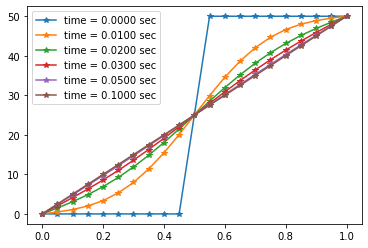

In [47]:
n_list = [0,100,200,300,500,1000]
#n_list = [0,10,20,30,50,100,200]
for n in n_list:
    t = n *h_t
    plt.plot(x_arr, T_Data[n,:],'*-',label = 'time = %.4f sec'%(t))

#==
plt.legend(loc="upper left")

In [ ]:

#Change BCs to 
#T = 0 at x = 0 
#T = 50 at x =1 








